# Wyznaczenie matematycznego modelu procesu ryzyka oraz prawdopodobieństwa ruiny
## Michał Mularczyk 


*** 

<br>

**Spis Treści:**
 1. [Klasyczny proces ryzyka](#Klasyczny-proces-ryzyka)
 2. [Cel](#Cel)
 3. [Wyznaczenie matematycznego modelu procesu ryzyka](#Wyznaczenie-matematycznego-modelu-procesu-ryzyka)  
     3.1 [Wyznaczenie rozkładu $X_i$](#Wyznaczenie-rozkładu-$X_i$)  
     3.2 [Wyznaczenie rozkładu $T_i$](#Wyznaczenie-rozkładu-$T_i$)    
     3.3 [Matematyczny model procesu ryzyka](#Matematyczny-model-procesu-ryzyka)  
 4. [Wyznaczenie prawdopodobieństwa ruiny](#Wyznaczenie-prawdopodobieństwa-ruiny)  
     4.1 [Generowanie procesu ryzyka](#Generowanie-procesu-ryzyka)  
     4.2 [Prawdopodobieństwo ruiny](#Prawdopodobieństwo-ruiny)  
 5. [Wnioski](#Wnioski)
   

<br>
<br>

## Klasyczny proces ryzyka 
Klasyczny proces ryzyka jest procesem, który opisuje kapitał firmy ubezpieczeniowej. Wyrażony jest wzorem

$$R(t) = u+c\cdot t-\sum_{i=1}^{N(t)}X_i$$

w którym: $u>0$ - kapitał początkowy, $c\cdot t$ - premia (pieniądze uzyskane ze sprzedaży), $N(t)$ - proces liczący liczbę szkód, $X_i$ - wielkość i-tej szkody ($X_i$ - i.i.d.).  

Momentem ruiny dla takiego procesu nazywamy pierwszy moment, w którym proces ryzyka spada poniżej zera, czyli

$$\tau(u) = inf\{t\geq0:R(t)<0\},$$

$\tau(u)$ może wynosić $\infty$, jeśli trajektoria nigdy nie spadnie poniżej zera. 

Prawdopodobieństwo ruiny w skończonym czasie $T$ wynosi

$$\Psi(u,T)=P(\tau(u)\leq T).$$

Natomiast prawdopodobieństwo ruiny w nieskończonym czasie równe jest

$$\Psi(u)=P(\tau(u)<\infty).$$


<br>
<br>

## Cel
Celem jest wyznaczenie modelu matematycznego klasycznego procesu ryzyka, na podstawie danej pojedynczej jego trajektorii, przedstawionej na poniższym wykresie. Następnie napisanie funkcji generującej ten proces, by móc go przeanalizować oraz określić jego prawdopodobieństwo ruiny dla różnych czasów $T$ (liczba dni). 

In [84]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels
import scipy


In [85]:
R_d = pd.read_csv('R.csv', delimiter=',', header=None)
t_d = pd.read_csv('t.csv', delimiter=',', header=None)
R = R_d.to_numpy()
t = t_d.to_numpy()
R =  [x for l in R.tolist() for x in l] 
t =  [x for l in t.tolist() for x in l] 

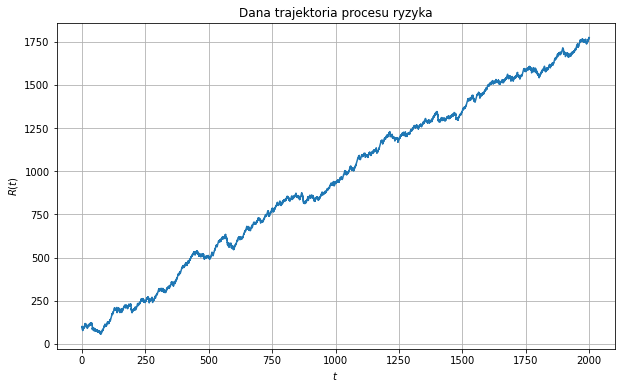

In [86]:
plt.figure(figsize=(10,6))
plt.plot(t,R)
plt.grid()
plt.xlabel(r'$t$')
plt.ylabel(r'$R(t)$')
plt.title('Dana trajektoria procesu ryzyka')
plt.show()

<br>
<br>

## Wyznaczanie modelu matematycznego procesu ryzyka

Pierwszym krokiem przy wyznaczaniu modelu procesu ryzyka, było obliczenie kapitału początkowego $u$, który był dla danych pierwszym elementem, czyli teoretycznie wartością dla $t=0$ 

$$u = R(0) = 100.$$

Następnie należało określić wartość stałej $c$. Wyznaczona została ona jako współczynnik kierunkowy funkcji liniowej, gdyż okresy w których trajektoria rośnie są w postaci takiej funkcji. Więc gdy $R$ - wartości trajektorii procesu ryzyka oraz $t$ - odpowiadający im czas:

$$c = \frac{R_1-R_0}{t_1-t_0}=5.5.$$

Kolejnym krokiem było wyznaczenie rozkładów dwóch zmiennych losowych: $X_i$ - wielkości szkód oraz $T_i$ - czasy oczekiwania na szkodę. Rozpocząłem od wyznaczenia konkretnych wartości dla podanego przypadku. Wykonaliśmy to za pomocą pętli, która dla każdego momentu w którym dochodziło do spadku wartości $R(t)$, zapisywała wartość tego spadku oraz czas po jakim do niego doszło. 


In [87]:
Xi = []
Ti = []
t_temp = 0

for i in range(len(R)-1):
    if R[i+1] < R[i]:
        Xi.append(R[i] - R[i+1])
        Ti.append(t[i] - t_temp)
        t_temp = t[i]
        

<br>
<br>

### Wyznaczenie rozkładu $X_i$ 
Na podstawie dystrybuanty empirycznej próbki, znajdującej się na wykresie poniżej, można założyć, że zmienna $X_i$ pochodzi z rozkładu jednostajnego. Należy zatem obliczyć jego parametry $a$ i $b$. Obliczymy wartość oczekiwaną oraz wariancję $X_i$: 


In [88]:
EXi = np.mean(Xi)
VarXi = np.var(Xi)
print('E(Xi) = ', EXi)
print('Var(Xi)= ', VarXi)

E(Xi) =  4.825910162512933
Var(Xi)=  7.7309739549108025


Następnie przekształcimy znane wzory na wariancję oraz wartość oczekiwaną rozkładu jednostajnego, aby otrzymać wartości $a$ i $b$:

$$
\left\{\begin{matrix}
EX = \frac{a+b}{2}\\ 
VarX = \frac{(b-a)^2}{12} 
\end{matrix}\right.
\quad \Rightarrow \quad 
\left\{\begin{matrix}
a = EX - \sqrt{3\cdot VarX}\\
b = EX + \sqrt{3\cdot VarX}
\end{matrix}\right.
$$


In [89]:
a = EXi - np.sqrt(3*VarXi)
b = EXi + np.sqrt(3*VarXi)
print('a = ', a)
print('b = ', b)

a =  0.010007145971548503
b =  9.641813179054317



Znając $a$ i $b$ możemy teraz porównać dystrybuantę empiryczną z teoretyczną, daną wzorem:

$$F_X (x)=
\left\{\begin{matrix}
0, & x<a\\
\frac{x-a}{b - a},&  a\leq x<b\\
1, & b\leq x
\end{matrix}\right.
$$

Można też porównać unormowany histogram danych z funkcją gęstości, wyrażoną wzorem:

$$f_X (x) = \frac{1}{b - a}, \quad a\leq x\leq b$$

Poniżej znajdują sie wykresy na których widoczne jest porównanie danych z funkcjami opisanymi powyżej.


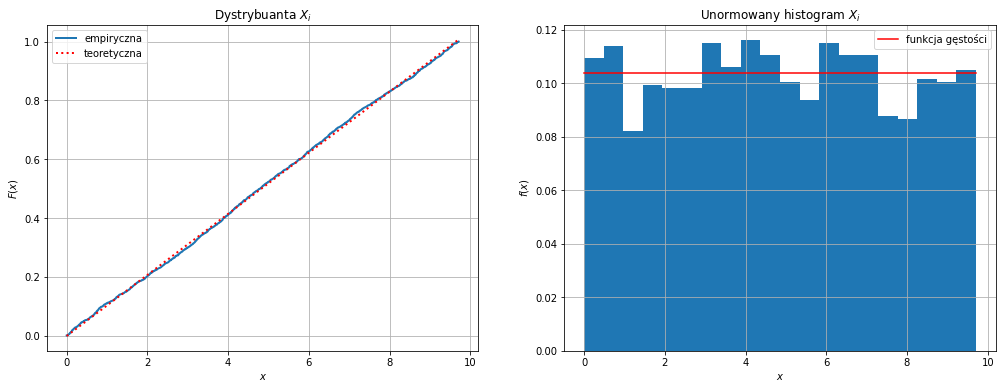

In [90]:
ecdf_Xi = ECDF(Xi)

fig, axs = plt.subplots(1, 2, figsize=(17,6))
    
axs[0].plot(ecdf_Xi.x, ecdf_Xi.y, label='empiryczna', linewidth=2)
axs[0].plot(ecdf_Xi.x, (ecdf_Xi.x - a)/(b - a), 'r:', linewidth=2, label='teoretyczna')
axs[0].set_title(r'Dystrybuanta $X_i$')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$F(x)$')
axs[0].grid()
axs[0].legend()
 
x = np.linspace(np.min(Xi), np.max(Xi), 1000)
axs[1].hist(Xi, bins=20, density=True)
axs[1].plot(x, [1/(b-a)]*1000, 'r', label='funkcja gęstości')
axs[1].set_title(r'Unormowany histogram $X_i$')
axs[1].set_ylabel(r'$f(x)$')
axs[1].set_xlabel(r'$x$')
axs[1].grid()
axs[1].legend()

plt.show()

Do zweryfikowania czy $X_i$ pochodzi z tego rozkładu jednostajnego posłuży test Kołmogorowa-Smirnowa dla dwóch prób. Zwraca on wartość statystyki $D$, która określa maksymalną różnicę pomiędzy dystrybuantami badanych prób. Hipoteza zerowa testu mówi o tym, że próby pochodzą z tego samego rozkładu ciągłego. $X_i$ porównana zostanie z próbą z rozkładu jednostajnego o wyznaczonych wcześniej parametrach $a$ oraz $b$.

In [8]:
KS_test, p = scipy.stats.kstest(Xi, 'uniform', args=(a, b))
print('Test Kołmogorowa-Smirnowa: ', KS_test, ', p-wartość: ', p)


Test Kołmogorowa-Smirnowa:  0.01375675597824233 , p-wartość:  0.8748849533186684


Niska wartość statystyki testowej oraz wysoka $p$-wartość, określająca minimalny poziomn istotności przy którym uzyskana wartość statystyki prowadziłaby do odrzucenia hipotezy zerowej, nie dają nam podstaw do odrzucenia hipotezy zerowej, mówiącej że próby pochodzą z tego samego rozkładu.

Na podstawie tego wyniku, pokrywania się wykresu dystrybuanty teoretycznej z empiryczną oraz gęstości teoretycznej z unormowanym histogramem $X_i$, możemy uznać, że $X_i$ ma rozkład jednostajny o parametrach $a \approx 0.01$ oraz $b \approx 9.642$.

<br>
<br>

### Wyznaczenie rozkładu $T_i$


Wiemy, że czas oczekiwania na przyrost procesu Poissona $N(t)$ ma rozkład wykładniczy. Wykres dystrybuanty empirycznej $T_i$ znajdujący się poniżej również sugeruje, że pochodzi z rozkładu wykładniczego. Zakładając, że rzeczywiście tak jest, należy wyznaczyć parametr $\lambda$ rozkładu wykładniczego. Wykorzystany do tego zostanie wzór na wartość oczekiwaną:

$$EX = \frac{1}{\lambda} \Rightarrow \lambda = \frac{1}{EX}.$$

In [91]:
EX = np.mean(Ti)
lmbd = 1/EX
print('E(Ti) = ', EX)
print('lambda = ', lmbd)

E(Ti) =  1.0944170771756978
lambda =  0.913728432108027


Korzystając z wyznaczonego parametru $\lambda$ porównana zostanie empiryczna dystrybuanta z teoretyczną, wyrażoną wzorem:

$$F(x) = 1-e^{-\lambda x}.$$

Unormowany histogram $T_i$ zostanie porównany z teoretyczną gęstością rozkładu wykładniczego daną wzorem:

$$f(x) = \lambda e^{-\lambda x}, \quad 0 \leq x.$$

Dystrybuanta empiryczna pokrywa się z teoretyczną, sytuacja wygląda podobnie w wypadku unormowanego histogramu oraz gęstości. Potwierdza to, że rozkład $T_i$ jest rozkładem wykładniczym o parametrz $\lambda \approx 0.9137$.

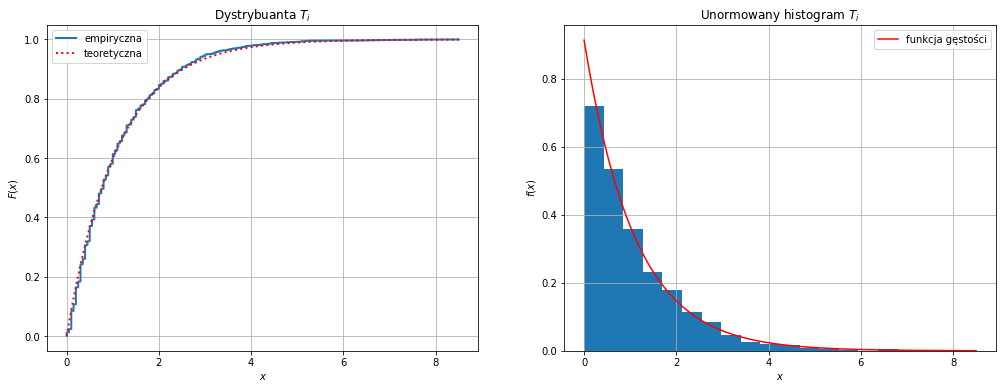

In [92]:
ecdf_Ti = ECDF(Ti)

fig, axs = plt.subplots(1, 2, figsize=(17,6))
    
axs[0].plot(ecdf_Ti.x, ecdf_Ti.y, label='empiryczna', linewidth=2)
axs[0].plot(ecdf_Ti.x, (1 - np.exp(- lmbd*ecdf_Ti.x)) , 'r:', linewidth=2, label='teoretyczna')
axs[0].set_title(r'Dystrybuanta $T_i$')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$F(x)$')
axs[0].grid()
axs[0].legend()
 
x = np.linspace(np.min(Ti), np.max(Ti), 1000)
axs[1].hist(Ti, bins=20, density=True)
axs[1].plot(x, lmbd*np.exp(-lmbd*x), 'r', label='funkcja gęstości')
axs[1].set_title(r'Unormowany histogram $T_i$')
axs[1].set_ylabel(r'$f(x)$')
axs[1].set_xlabel(r'$x$')
axs[1].grid()
axs[1].legend()

plt.show()

<br>
<br>

### Matematyczny model procesu ryzyka

Po wyznaczeniu potrzebnych stałych oraz zmiennych losowych, byliśmy w stanie stworzyć matematyczny model klasycznego procesu ryzyka. prezentuje się on następująco:

$$R(t) = 100+5.5\cdot t-\sum_{i=1}^{N(t)}X_i$$

gdzie $X_i$ ma rozkład jednostajny o parametrach $a=0.01$ oraz $b=9.642$, a $N(t)$ jest jednorodnym procesem Poissona, a którym czas oczekiwania na przyrost ma rozkład wykładniczy o parametrze $\lambda = 0.9137$. 

<br>
<br>

## Wyznaczenie prawdopodobieństwa ruiny



### Generowanie procesu ryzyka

Teraz gdy matematyczny model ryzyka danej próbki jest już znany, możliwe jest symulowanie za jego pomocą trajektorii. Poniższa funkcja umożliwia generowanie trajektorii procesu ryzyka dla dowolnych parametrów, domyślnie jednak przyjmuje ich wartości obliczone powyżej, dla dowolnego horyzontu czasowego $T$. 

In [93]:
def trajektoria_procesu_ryzyka(u=100, c=5.5, T=1000, N = 1000, lmbd=0.9137, a=0.01, b=9.642):
    '''Funkcja generująca trajektorię procesu ryzyka. Jako parametry wejściowe przyjmuje kapitał początkowy - u, 
    liczba premii uzyskiwana w każdym okresie - c, horyzont czasowy - T, parametr procesu Poissona - lmbd, oraz 
    parametry rozkładu jednostajnego - a i b. Funkcja zwraca wektor zawierający trajektorię procesu ryzyka, wektor
    zawierający jej argumenty oraz wartość logiczną "True", jeśli dana trajektoria osiągneła ruinę, lub "False" w 
    przeciwnym wypadku.'''

    step=0.05
    ti = np.linspace(0, T, int((T) / step + 1))
    
    X = np.zeros(len(ti))
    Nt = np.random.poisson(lmbd*T)
    Xi = np.random.uniform(a,b, Nt)  # Wartości i-tych strat
    Si = np.sort(T*np.random.rand(Nt))  # Momenty i-tych strat
    
    j = 0
    k = 0
    while (j < len(ti)) and (k < Nt):
        if ti[j] > Si[k]:
            X[j] = Xi[k]
            k += 1
        j += 1
    X = np.cumsum(X)

    
    # Generowanie procesu ryzyka
    R = np.zeros(len(ti))
    ruin = False
    
    for i in range(len(ti)):
        r = (u + ti[i]*c - X[i])
        if r < 0:
            ruin = True
        R[i] = r
 
    return R, ti, ruin


Poniżej znajduje się przykładowa trajektoria procesu ryzyka wygenerowana za pomocą powyższej funkcji.

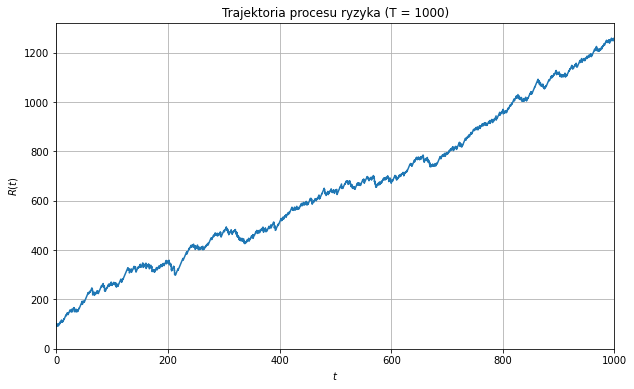

In [94]:
T = 1000
R, ti, r = trajektoria_procesu_ryzyka(T=T)

plt.figure(figsize=(10,6))
plt.plot(ti,R)
plt.title('Trajektoria procesu ryzyka (T = {0})'.format(T))
plt.xlabel(r'$t$')
plt.ylabel(r'$R(t)$')
plt.grid()
plt.ylim([np.min([0, np.min(R)]), np.max(R)*1.05])
plt.xlim([np.min(ti), np.max(ti)])
plt.show()

Moment ruiny jest pierwszym momentem w którym trajektoria procesu spada poniżej zera. Poniżej znajdują się przykładowe trajektorie które osiągneły ruinę. 

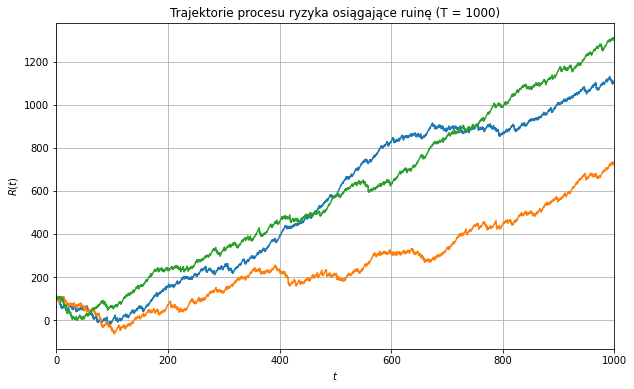

In [81]:
T = 1000
i = 0
plt.figure(figsize=(10,6))
while i < 3:
    R, ti, r = trajektoria_procesu_ryzyka(T=T)
    if r == True:
        plt.plot(ti,R)
        i += 1
plt.title('Trajektorie procesu ryzyka osiągające ruinę (T = {0})'.format(T))
plt.xlabel(r'$t$')
plt.ylabel(r'$R(t)$')
plt.grid()
plt.xlim([np.min(ti), np.max(ti)])
plt.show()

<br>
<br>

### Prawdopodobieństwo ruiny

Prawdopodobieństwo ruiny procesu ryzyka dla danego horyzontu czasowego $T$ wyznaczone zostanie poprzez wielokrotne wygenerowanie tego procesu i zliczenie trajektorii które osiągneły ruinę. Następnie liczba tych trajektorii będzie podzielona przez ilość wszystkich wygenerowanych. 

W poniższej tabeli znajdują się wyniki symulacji trajektorii dla różnych horyzontów czasowych $T$, $n$ oznacza liczbę trajektorii, które osiągneły ruinę, natomiast $\Psi$ jest wyznaczonym prawdopodobieństwem ruiny. W każdej symulacji trajektorie zostały wygenerowane $30000$ razy. Pod tabelą znajduje się przykładowa symulacja oraz wykres przedstawiający prawdopodobieństwa ruiny $\Psi$ w zależności od horyzontu czasowego $T$.

| $T$ | $n$ | $\Psi$ |
:-:|:-:|:-:
| 20 | 1 | 0.00003 |
| 50 | 11 | 0.00037 |
| 75 | 22 | 0.00073 |
| 100 | 25 | 0.00083 |
| 180 | 34 | 0.00113 |
| 365 | 33 | 0.00110 |
| 500 | 31 | 0.00103 |
| 750 | 32 | 0.00107 |
| 1000 | 29 | 0.00097 |
| 1250 | 39 | 0.00130 |
| 1500 | 42 | 0.00140 |
| 1750 | 37 | 0.00123 |
| 2000 | 33 | 0.00110 |
| 2250 | 37 | 0.00123 |
| 2500 | 33 | 0.0110 |

In [63]:
def symulacja_prawdop_ruiny(N, T):
    n = 0
    for i in range(N):
        R, ruin = proces_ryzyka_trajektoria(T = T)
        n += ruin
    return n, n/N

T = 50
N = 30000

n, psi = symulacja_prawdop_ruiny(N, T)
print('T: ', T, ' n: ', n, ' Psi: ', psi)

T:  50 n:  13 Psi:  0.0004333333333333333


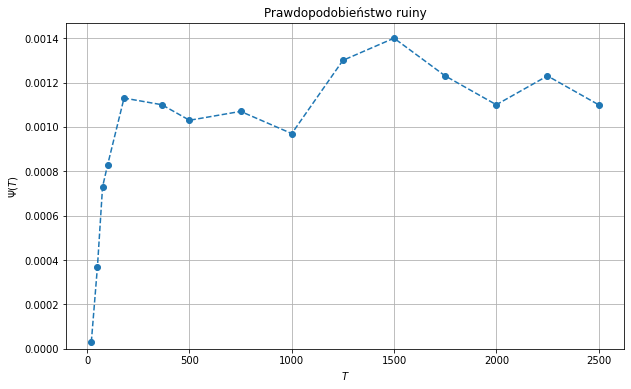

In [99]:
psi = [0.00003, 0.00037, 0.00073, 0.00083, 0.00113, 0.00110, 0.00103, 0.00107, 0.00097, 0.00130, 0.0014, 0.00123, 0.00110, 0.00123, 0.00110]
T = [20, 50, 75, 100, 180, 365, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
plt.figure(figsize=(10,6))
plt.plot(T, psi, linestyle='--', marker='o')
plt.ylim([0, np.max(psi)*1.05])
plt.title('Prawdopodobieństwo ruiny')
plt.xlabel(r'$T$')
plt.ylabel(r'$\Psi (T)$')
plt.grid()
plt.show()

<br>
<br>

## Wnioski 

Celem projektu było wyznaczenie matematycznego modelu ryzyka w oparciu o jego pojedynczą trajektorię. Następnie wykonanie wielokrotnych symulacji tego procesu dla różnych wartości horyzontu czasowego $T$, aby określić odpowiadające im prawdopodobieństwo ruiny. 

Analiza wykresu wartości prawdopodobieństw ruiny $\Psi$ w zależności od horyzontu czasowego $T$ znajdującego się powyżej, pozwala zauważyć, że dla horyzontów czasowych do wartości około $T=180$ prawdopodobieństwo ruiny zdecydowanie wzrasta. Jednak dla wyższych wartości $T$, wartość prawdopodobieństwa ruiny przestaje wykazywać widoczny wcześniej trend rosnący i zaczyna utrzymywać się na zbliżonym poziomie. 

Po ponownym spojrzeniu na wykres na którym przedstawione zostały przedstawione trajektorie które osiągneły ruinę można wywnioskować co może być powodem takiego wyniku. W wyznaczonym modelu moment ruiny najczęściej osiągany jest dla zakresu czasu w którym można zaobserwować wzrost prawdopodobieństwa ruiny. Dla czasów powyżej ok. $T=180$ kapitał przedsiębiorstwa ubezpieczeniowego jest na tyle duży, że szanse na wielkość szkód, które doprowadzą do ruiny, jest znikoma. Dlatego dla dużych horyzontów czasowych prawdopodobieństwo ruiny nie wykazuje widocznego wzrostu.